<a href="https://colab.research.google.com/github/RohEunSeo/LGAimers/blob/main/train_data%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 필수 라이브러리

In [ ]:
import os
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# 데이터 읽어오기

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/lgAimers.5(updated.ver)"
RANDOM_STATE = 110

# 파일 경로 설정
train_data_path = os.path.join(ROOT_DIR, "train.csv")

# 데이터 읽어오기
train_data = pd.read_csv(train_data_path)

train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,NaN,NaN,...,318,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,NaN,NaN,...,14,NaN,NaN,197,NaN,NaN,1,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,NaN,NaN,...,1,NaN,NaN,27,NaN,NaN,1,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,NaN,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


# 데이터 프레임 정보

In [ ]:
train_data.describe()

,Insp. Seq No._Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Z Unit Time_Dam,CURE END POSITION Z Judge Value_Dam,CURE END POSITION Θ Collect Result_Dam,CURE END POSITION Θ Unit Time_Dam,CURE END POSITION Θ Judge Value_Dam,...,PalletID Judge Value_Fill2,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2
count,40506.0,40506.000000,0.0,0.0,40506.000000,0.0,0.0,40506.000000,0.0,0.0,...,0.0,40506.000000,0.0,0.0,40506.000000,0.0,0.0,40506.000000,0.0,0.0
mean,1.0,530.370809,NaN,NaN,6.320669,NaN,NaN,-21.227966,NaN,NaN,...,NaN,73.539648,NaN,NaN,108.691453,NaN,NaN,0.771392,NaN,NaN
std,0.0,369.283055,NaN,NaN,4.858988,NaN,NaN,87.461776,NaN,NaN,...,NaN,105.176311,NaN,NaN,130.758018,NaN,NaN,1.289203,NaN,NaN
min,1.0,240.000000,NaN,NaN,2.500000,NaN,NaN,-90.000000,NaN,NaN,...,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,1.0,240.000000,NaN,NaN,2.500000,NaN,NaN,-90.000000,NaN,NaN,...,NaN,7.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN
50%,1.0,240.000000,NaN,NaN,2.500000,NaN,NaN,-90.000000,NaN,NaN,...,NaN,13.000000,NaN,NaN,49.000000,NaN,NaN,1.000000,NaN,NaN
75%,1.0,1000.000000,NaN,NaN,12.500000,NaN,NaN,90.000000,NaN,NaN,...,NaN,120.000000,NaN,NaN,196.000000,NaN,NaN,1.000000,NaN,NaN
max,1.0,1000.000000,NaN,NaN,12.500000,NaN,NaN,90.000000,NaN,NaN,...,NaN,487.000000,NaN,NaN,608.000000,NaN,NaN,17.000000,NaN,NaN


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 464 entries, Wip Line_Dam to target
dtypes: float64(350), int64(77), object(37)
memory usage: 143.4+ MB


# 결측치 제거(모든 행이 Nan값인 열 제거)

In [ ]:
# 결측치 확인
missing_values = train_data.isnull().sum()

# 결측치가 있는 열들만 출력
missing_columns = missing_values[missing_values > 0]
print(f"Columns with missing values:\n{missing_columns}")

# 모든 행이 결측치인 열 제거
columns_to_drop = missing_values[missing_values == len(train_data)].index
train_data_cleaned = train_data.drop(columns=columns_to_drop)


Columns with missing values:
CURE END POSITION X Unit Time_Dam      40506
CURE END POSITION X Judge Value_Dam    40506
CURE END POSITION Z Unit Time_Dam      40506
CURE END POSITION Z Judge Value_Dam    40506
CURE END POSITION Θ Unit Time_Dam      40506
                                       ...  
Production Qty Judge Value_Fill2       40506
Receip No Unit Time_Fill2              40506
Receip No Judge Value_Fill2            40506
WorkMode Unit Time_Fill2               40506
WorkMode Judge Value_Fill2             40506
Length: 286, dtype: int64


# 결측치 제거(모든 열이 0인 경우)

In [ ]:
# 모든 값이 0인 열 식별
columns_to_drop = train_data_cleaned.columns[(train_data_cleaned == 0).all()]

# 해당 열들을 삭제
train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop)

# 삭제된 열들의 이름 확인
deleted_columns = columns_to_drop.tolist()
print(f"삭제된 열: {deleted_columns}")

삭제된 열: ['CURE STANDBY POSITION Θ Collect Result_Dam', 'CURE STANDBY POSITION Θ Collect Result_Fill2', 'DISCHARGED SPEED OF RESIN Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2', 'Dispense Volume(Stage1) Collect Result_Fill2', 'Dispense Volume(Stage2) Collect Result_Fill2', 'Dispense Volume(Stage3) Collect Result_Fill2']


In [ ]:
train_data_cleaned

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [ ]:
#train_data_cleaned.to_csv("/content/drive/MyDrive/lgAimers.5(updated.ver)/train_data_cleaned.csv")
#train_data_cleaned.to_excel("/content/drive/MyDrive/lgAimers.5(updated.ver)/train_data_cleaned.xlsx")

# 1차 결측치 제거 후 남은 결측치 확인

In [ ]:
# 결측치가 있는 열과 결측치 개수 출력
missing_values_cleaned = train_data_cleaned.isnull().sum()
missing_columns_cleaned = missing_values_cleaned[missing_values_cleaned > 0]

# 결측치가 있는 열의 개수
print(f"\nNumber of columns with missing values: {len(missing_columns_cleaned)}")

# 결측치가 있는 열과 결측치 개수 출력
print("\nMissing values in each column:")
for column, missing_count in missing_columns_cleaned.items():
    print(f"{column}: {missing_count} missing values")


Number of columns with missing values: 8

Missing values in each column:
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam: 12766 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam: 29213 missing values
GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave: 29213 missing values
GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave: 29213 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1: 12766 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1: 29213 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2: 12766 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2: 29213 missing values


# 결측치 분포 시각화 함수

In [ ]:
def plot_value_distribution(df, title):
    columns_with_na = df.columns[df.isnull().any()]
    for col in columns_with_na:
        plt.figure(figsize=(10, 5))
        df[col].value_counts(dropna=False).plot.bar()
        plt.title(f'{title} - {col} Value Distribution')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()


columns_to_analyze = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
    'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
    'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'
]


X_Dam = train_data_cleaned[['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam']]
X_AutoClave = train_data_cleaned[['GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave']]
X_Fill1 = train_data_cleaned[['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1']]
X_Fill2 = train_data_cleaned[['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2']]

# Dam 결측치 시각화

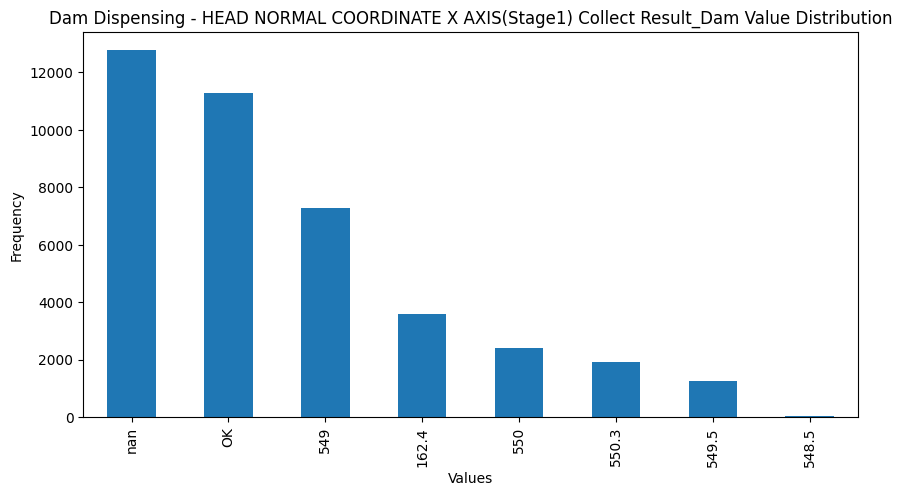

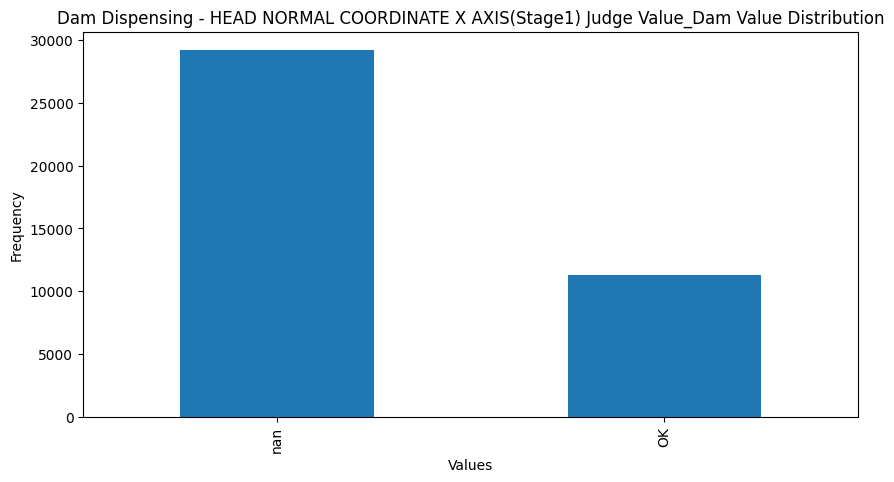

In [ ]:
plot_value_distribution(X_Dam, 'Dam Dispensing')

# AutoClave 결측치 시각화

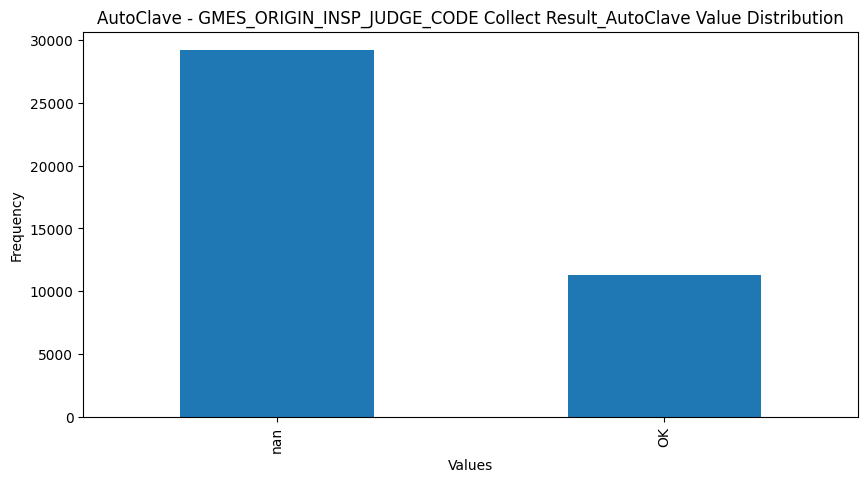

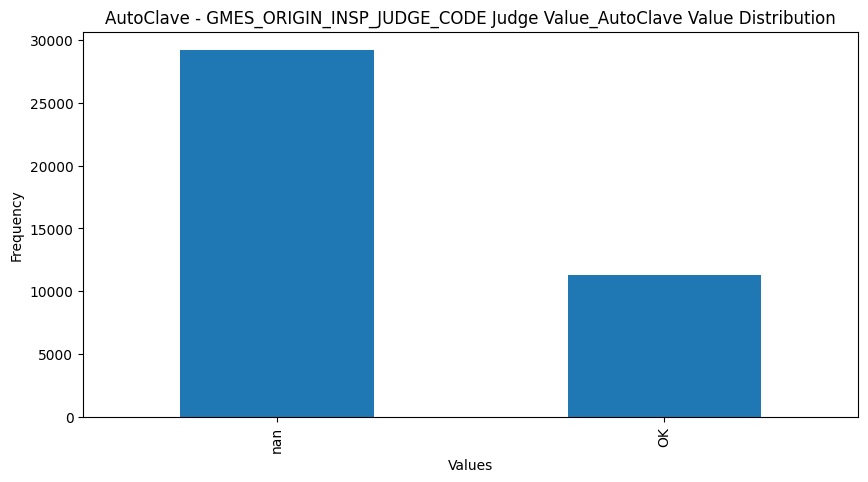

In [ ]:
plot_value_distribution(X_AutoClave, 'AutoClave')

# Fill1 결측치 시각화

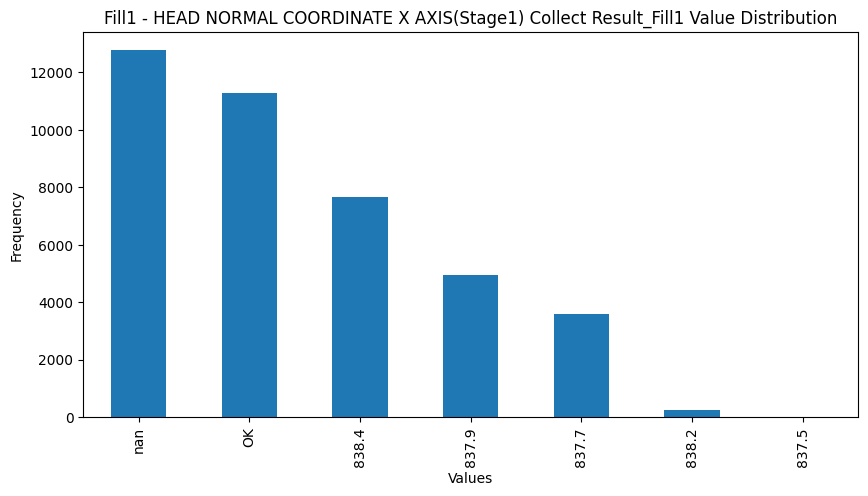

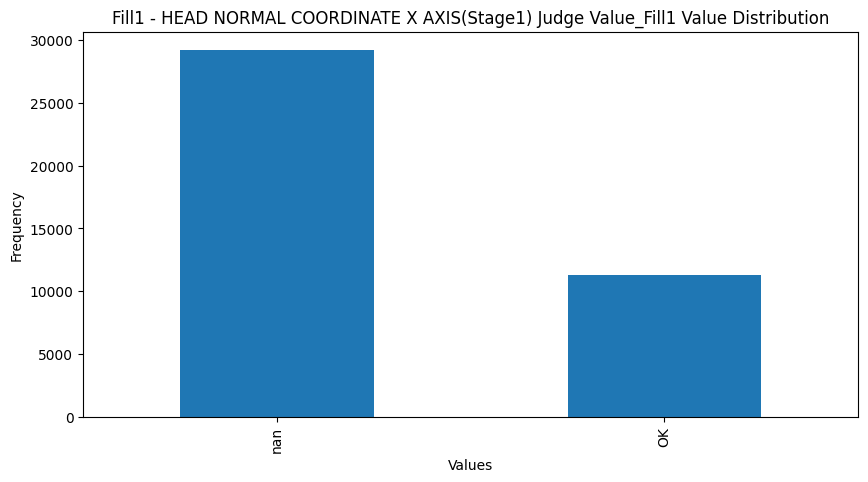

In [ ]:
plot_value_distribution(X_Fill1, 'Fill1')

# Fill2 결측치 시각화

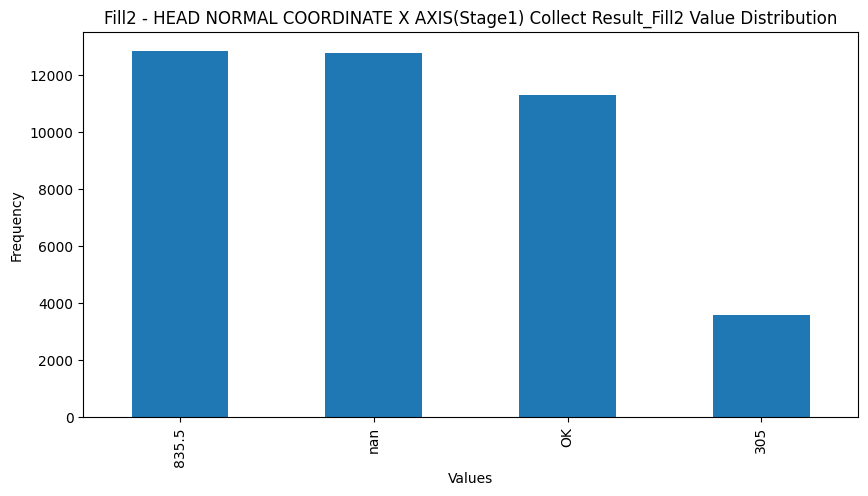

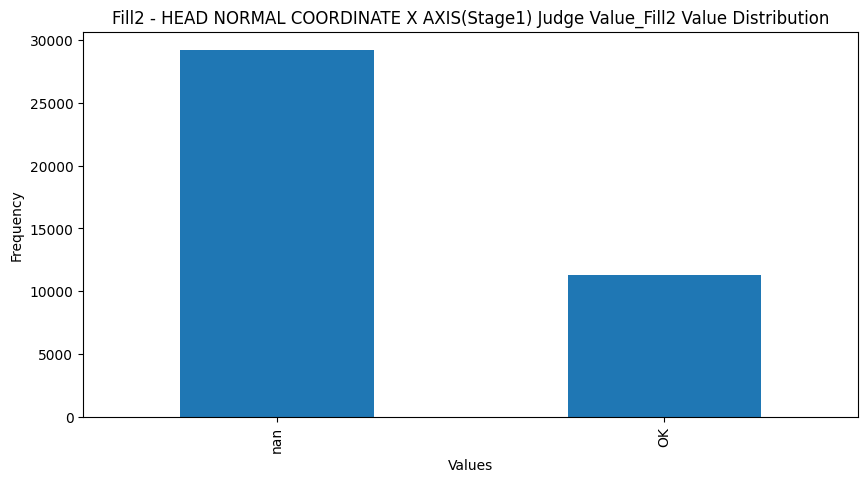

In [ ]:
plot_value_distribution(X_Fill2, 'Fill2')

# 결측치 제거(Nan값, OK만 있는 경우)

In [ ]:
# 삭제할 열 목록
columns_to_drop = [
    "Wip Line_Dam",
    "Wip Line_AutoClave",
    "Wip Line_Fill1",
    "Wip Line_Fill2",
    "Insp. Seq No._Dam",
    "Insp Judge Code_Dam",
    "Insp. Seq No._AutoClave",
    "Insp Judge Code_AutoClave",
    "Insp. Seq No._Fill1",
    "Insp Judge Code_Fill1",
    "Insp. Seq No._Fill2",
    "Insp Judge Code_Fill2",
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
    'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
    'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
    "1st Pressure Judge Value_AutoClave",
    "2nd Pressure Judge Value_AutoClave",
    "3rd Pressure Judge Value_AutoClave",
    "PalletID Collect Result_Dam",
    "Receip No Collect Result_Dam",
    "PalletID Collect Result_Fill1",
    "Receip No Collect Result_Fill1",
    "PalletID Collect Result_Fill2",
    "Receip No Collect Result_Fill2"


]

# 열 삭제
train_data_cleaned.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# 남은 결측치가 있는 열과 결측치 개수 확인
remaining_missing_values_cleaned = train_data_cleaned.isnull().sum()
remaining_missing_columns_cleaned = remaining_missing_values_cleaned[remaining_missing_values_cleaned > 0]

# 결측치가 있는 열의 개수 출력
print(f"\nNumber of columns with missing values: {len(remaining_missing_columns_cleaned)}")

# 결측치가 있는 열과 결측치 개수 출력
print("\nMissing values in each column:")
for column, missing_count in remaining_missing_columns_cleaned.items():
    print(f"{column}: {missing_count} missing values")


Number of columns with missing values: 3

Missing values in each column:
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam: 12766 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1: 12766 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2: 12766 missing values


In [ ]:
#train_data_cleaned.to_csv("/content/drive/MyDrive/lgAimers.5(updated.ver)/train_data_cleaned.csv")

# 결측치 대체(Dam, Fill1, Fill2 x 좌표)

**OK를 Nan으로 바꾸기**

In [ ]:
# OK 값을 NaN으로 변경할 열 목록
columns_to_modify = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
]

# OK 값을 NaN으로 변경
for column in columns_to_modify:
    train_data_cleaned[column] = train_data_cleaned[column].replace('OK', pd.NA)
# 모든 결측치를 NaN으로 통일
train_data_cleaned = train_data_cleaned.replace({pd.NA: np.nan})

# 모든 열을 숫자로 변환하고, 변환할 수 없는 값을 NaN으로 처리
columns_to_convert = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1'
]

for column in columns_to_convert:
    train_data_cleaned[column] = pd.to_numeric(train_data_cleaned[column], errors='coerce')

In [ ]:
# 남은 결측치가 있는 열과 결측치 개수 확인
remaining_missing_values_cleaned = train_data_cleaned.isnull().sum()
remaining_missing_columns_cleaned = remaining_missing_values_cleaned[remaining_missing_values_cleaned > 0]

# 결측치가 있는 열의 개수 출력
print(f"\nNumber of columns with missing values: {len(remaining_missing_columns_cleaned)}")

# 결측치가 있는 열과 결측치 개수 출력
print("\nMissing values in each column:")
for column, missing_count in remaining_missing_columns_cleaned.items():
    print(f"{column}: {missing_count} missing values")


Number of columns with missing values: 3

Missing values in each column:
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam: 24059 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1: 24059 missing values
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2: 24059 missing values


# 데이터 분포 시각화

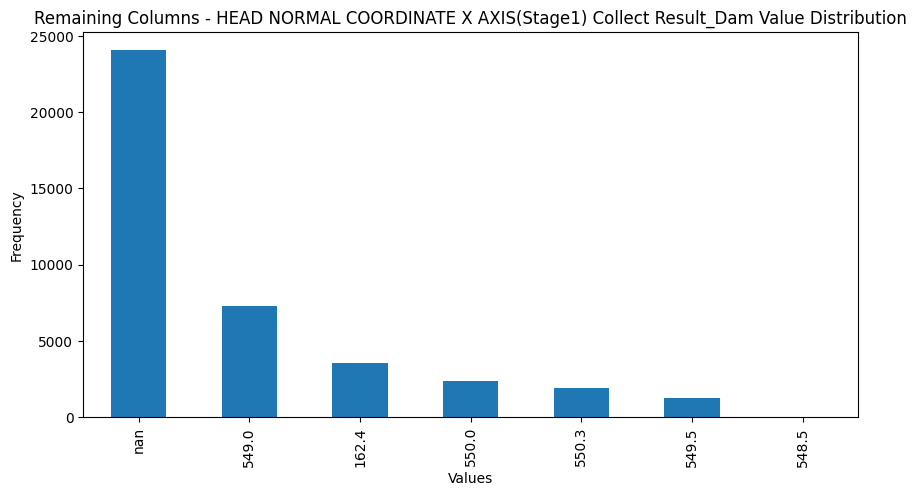

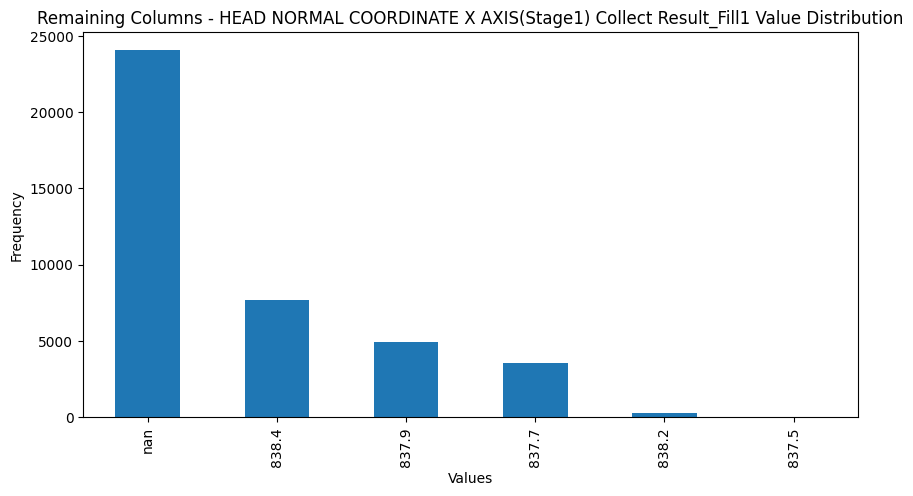

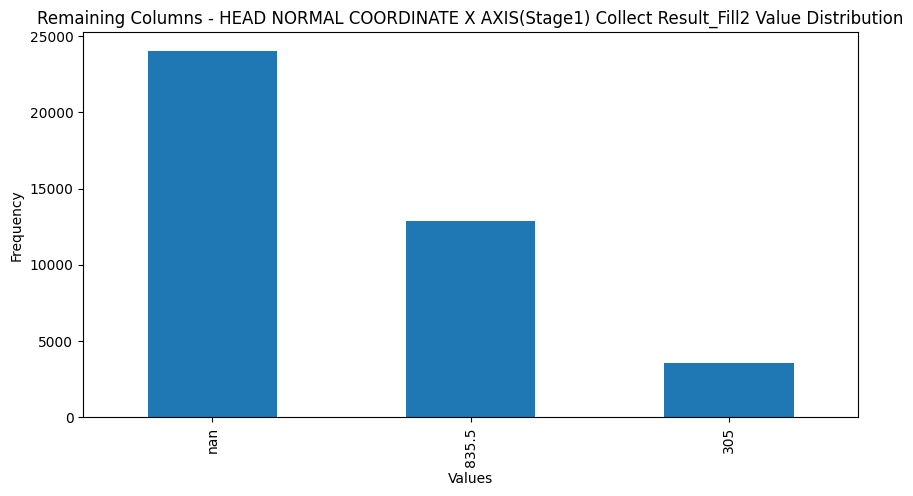

In [ ]:
# 결측치가 있는 열의 값 분포를 시각화하는 함수 정의
def plot_value_distribution(df, title):
    columns_with_na = df.columns[df.isnull().any()]
    for col in columns_with_na:
        plt.figure(figsize=(10, 5))
        df[col].value_counts(dropna=False).plot.bar()
        plt.title(f'{title} - {col} Value Distribution')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()

# 남은 열들에 대한 데이터프레임 생성
X_Remaining = train_data_cleaned[columns_to_modify]

# 값 분포 시각화
plot_value_distribution(X_Remaining, 'Remaining Columns')

In [ ]:
#train_data_cleaned.to_csv("/content/drive/MyDrive/lgAimers.5(updated.ver)/train_data_cleaned.csv")

# 결측치 대체(Fill2)

In [ ]:
# Stage1 Collect Result Fill2에서 NaN 값을 대체하기 위한 조건 정의
condition_1 = (train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2'] == 304.8) & (train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2'] == 499.8)
condition_2 = (train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2'] == 305.0) & (train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2'] == 499.8)
condition_3 = (train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2'] == 835.5) & (train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2'] == 458)

# 정의된 조건에 따라 Stage1의 NaN 값을 각각 대체
train_data_cleaned.loc[condition_1 & train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isna(), 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'] = 694.2
train_data_cleaned.loc[condition_2 & train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isna(), 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'] = 694
train_data_cleaned.loc[condition_3 & train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isna(), 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'] = 156

In [ ]:
# Stage1 Collect Result Fill2에서 결측치가 모두 채워졌는지 확인
missing_values_count = train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isna().sum()
print(f"남아있는 결측치 개수: {missing_values_count}")

# Stage1, Stage2, Stage3의 경우의 수와 count를 계산
result_df = train_data_cleaned.groupby(['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2']).size().reset_index(name='Count')

result_df

남아있는 결측치 개수: 0


,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2,Count
0,156,835.5,458.0,12158
1,694,305.0,499.8,11005
2,694.2,304.8,499.8,896
3,305,499.8,694.0,3579
4,835.5,458.0,156.0,12868


# Dam 결측치 대체

In [ ]:
# 결측치 대체 함수: Dam_Stage1
def fill_within_range_dam(train_data_cleaned, target_column, stage2_column, stage3_column, valid_values, valid_range):
    for index in train_data_cleaned[target_column].index:
        if pd.isna(train_data_cleaned.at[index, target_column]):
            for value in valid_values:
                temp_sum = (value +
                            train_data_cleaned.at[index, stage2_column] +
                            train_data_cleaned.at[index, stage3_column])
                if valid_range[0] <= temp_sum <= valid_range[1]:
                    train_data_cleaned.at[index, target_column] = value
                    break
    return train_data_cleaned

In [ ]:
# Dam의 Stage1 결측치 대체 (가능한 값들만 사용)
valid_dam_values = [550.3, 550, 549.5, 549, 548.5, 162.4]  # Dam_Stage1에 존재하는 값들
train_data_cleaned = fill_within_range_dam(
    train_data_cleaned,
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
    valid_dam_values,
    (1170.7, 1180.5)
)



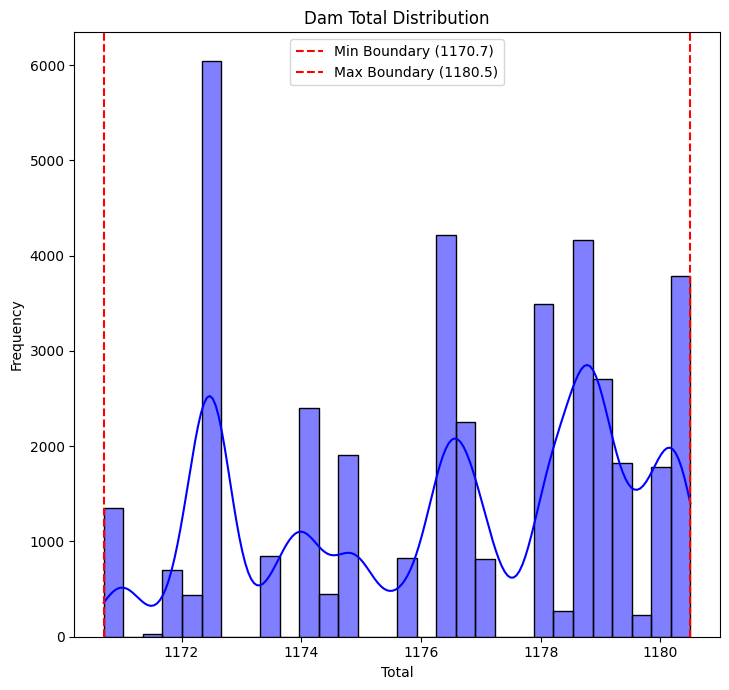

In [ ]:
# 박스플롯으로 결과 시각화
train_data_cleaned['Dam_Total'] = (
    train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] +
    train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam'] +
    train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam']
)
# 히스토그램과 KDE 플롯
plt.figure(figsize=(14, 7))

# Dam 총합의 분포 시각화
plt.subplot(1, 2, 1)
sns.histplot(train_data_cleaned['Dam_Total'].dropna(), kde=True, color='blue', bins=30)
plt.axvline(x=1170.7, color='red', linestyle='--', label='Min Boundary (1170.7)')
plt.axvline(x=1180.5, color='red', linestyle='--', label='Max Boundary (1180.5)')
plt.title('Dam Total Distribution')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Fill1_Total 열 삭제
train_data_cleaned.drop(columns=['Dam_Total'], inplace=True)

In [ ]:
# 결측치 개수 확인
missing_dam_after = train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isna().sum()
print(f"결측치 대체 후 남은 Dam의 결측치 개수: {missing_dam_after}")

결측치 대체 후 남은 Dam의 결측치 개수: 0


# Fill1 결측치 대체

In [ ]:
# Fill1의 결측치 대체에서 Stage2, Stage3를 변경하지 않고, 중복되는 경우 동일한 값을 사용
def fill_within_range_fill1(train_data_cleaned, target_column, stage2_column, stage3_column, valid_stage1_values, valid_range):
    # 가능한 조합을 미리 계산하여 저장
    fill1_replacement_dict = {}

    for index in train_data_cleaned[target_column].index:
        if pd.isna(train_data_cleaned.at[index, target_column]):
            stage2_value = train_data_cleaned.at[index, stage2_column]
            stage3_value = train_data_cleaned.at[index, stage3_column]
            key = (stage2_value, stage3_value)

            if key not in fill1_replacement_dict:
                possible_values = []
                for value1 in valid_stage1_values:
                    temp_sum = value1 + stage2_value + stage3_value
                    if valid_range[0] <= temp_sum <= valid_range[1]:
                        possible_values.append(value1)

                if possible_values:
                    # 첫 번째 가능한 값을 선택 (다른 정책을 사용할 수도 있음)
                    chosen_value = possible_values[0]
                    fill1_replacement_dict[key] = chosen_value

            if key in fill1_replacement_dict:
                train_data_cleaned.at[index, target_column] = fill1_replacement_dict[key]

    return train_data_cleaned
# 사용 가능한 Stage1의 값들 (제한된 범위)
valid_fill1_values1 = [838.4, 837.9, 837.7, 838.2, 837.5, 157, 158, 156.1]

In [ ]:
# Fill1의 Stage1 결측치 대체
train_data_cleaned = fill_within_range_fill1(
    train_data_cleaned,
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
    valid_fill1_values1,
    (1453, 1457)
)
train_data_cleaned.dropna(subset=['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'], inplace=True)

missing_fill1 = train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].isna().sum()
print(f"Fill1의 결측치 대체 후 남은 결측치 개수: {missing_fill1}")

Fill1의 결측치 대체 후 남은 결측치 개수: 0


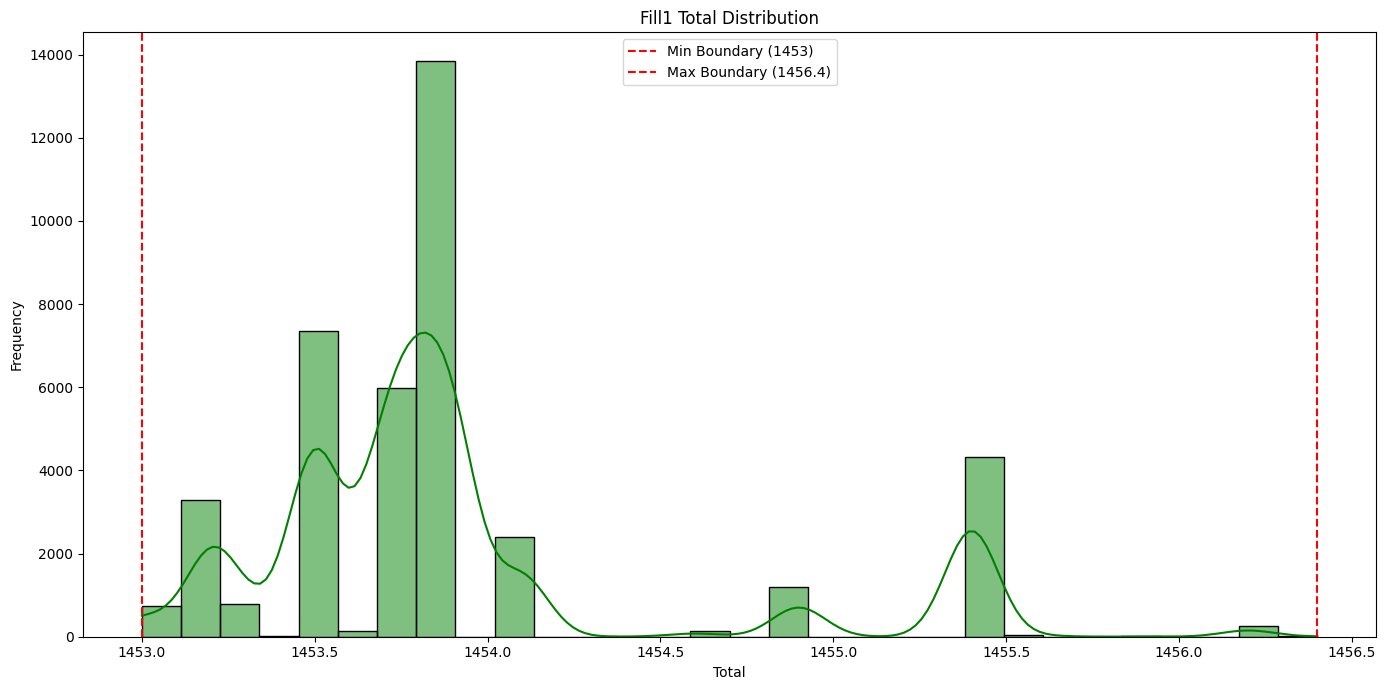

In [ ]:
# 총합 시각화
train_data_cleaned['Fill1_Total'] = (
    train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'] +
    train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1'] +
    train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1']
)

# 히스토그램과 KDE 플롯
plt.figure(figsize=(14, 7))

sns.histplot(train_data_cleaned['Fill1_Total'].dropna(), kde=True, color='green', bins=30)
plt.axvline(x=1453, color='red', linestyle='--', label='Min Boundary (1453)')
plt.axvline(x=1456.4, color='red', linestyle='--', label='Max Boundary (1456.4)')
plt.title('Fill1 Total Distribution')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Fill1_Total 열 삭제
train_data_cleaned.drop(columns=['Fill1_Total'], inplace=True)

In [ ]:
train_data_cleaned

,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Production Qty Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,7,1,Normal
1,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.600,185,0,Normal
2,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,10,1,Normal
3,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.900,268,0,Normal
4,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.700,121,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.200,318,0,Normal
40502,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1000.0,12.5,90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,14,1,Normal
40503,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,85.000,1,1,Normal
40504,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,20.100,117,0,Normal


# chamber 온도 파생변수 생성

In [ ]:
# 온도가 50도 이상인지 여부를 나타내는 파생변수 생성
'''train_data_cleaned['Is_Temp_Above_50'] = train_data_cleaned['Chamber Temp. Collect Result_AutoClave'].apply(lambda x: 1 if x >= 50 else 0)

# OK일 때 온도 차이 변수 생성 (50도 이상이어야 OK이므로 이 차이를 계산)
train_data_cleaned['Temp_Diff_OK'] = train_data_cleaned.apply(
    lambda row: row['Chamber Temp. Collect Result_AutoClave'] - 50 if row['Chamber Temp. Judge Value_AutoClave'] == 'OK' else 0, axis=1
)

# NG일 때 온도 차이 변수 생성 (49도 이하이어야 NG이므로 이 차이를 계산)
train_data_cleaned['Temp_Diff_NG'] = train_data_cleaned.apply(
    lambda row: 50 - row['Chamber Temp. Collect Result_AutoClave'] if row['Chamber Temp. Judge Value_AutoClave'] == 'NG' else 0, axis=1
)'''

"train_data_cleaned['Is_Temp_Above_50'] = train_data_cleaned['Chamber Temp. Collect Result_AutoClave'].apply(lambda x: 1 if x >= 50 else 0)\n\n# OK일 때 온도 차이 변수 생성 (50도 이상이어야 OK이므로 이 차이를 계산)\ntrain_data_cleaned['Temp_Diff_OK'] = train_data_cleaned.apply(\n    lambda row: row['Chamber Temp. Collect Result_AutoClave'] - 50 if row['Chamber Temp. Judge Value_AutoClave'] == 'OK' else 0, axis=1\n)\n\n# NG일 때 온도 차이 변수 생성 (49도 이하이어야 NG이므로 이 차이를 계산)\ntrain_data_cleaned['Temp_Diff_NG'] = train_data_cleaned.apply(\n    lambda row: 50 - row['Chamber Temp. Collect Result_AutoClave'] if row['Chamber Temp. Judge Value_AutoClave'] == 'NG' else 0, axis=1\n)"

In [ ]:
train_data_cleaned

,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Production Qty Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,7,1,Normal
1,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.600,185,0,Normal
2,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,10,1,Normal
3,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.900,268,0,Normal
4,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.700,121,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.200,318,0,Normal
40502,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1000.0,12.5,90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,14,1,Normal
40503,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,85.000,1,1,Normal
40504,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,20.100,117,0,Normal


# 이상치 처리 - IsolationForest

In [ ]:

# 1. 고유 식별자 및 target 열 제외
columns_to_exclude = ['target']  # 이전에 식별한 고유 식별자 열도 이 리스트에 추가

# 수치형 데이터만 선택하고, target과 고유 식별자 열 제외
numeric_columns = train_data_cleaned.select_dtypes(include=[np.number]).columns
columns_to_use = [col for col in numeric_columns if col not in columns_to_exclude]

# 2. IsolationForest 모델로 이상치 탐지
iso_forest = IsolationForest(contamination=0.01, random_state=42)
train_data_cleaned['anomaly'] = iso_forest.fit_predict(train_data_cleaned[columns_to_use])

# 3. 이상치 행 식별
outliers = train_data_cleaned[train_data_cleaned['anomaly'] == -1]

# 4. 각 열의 이상치 식별
outlier_details = {}
for col in columns_to_use:
    outlier_indices = outliers.index[outliers[col].notnull()].tolist()
    if outlier_indices:
        outlier_details[col] = outlier_indices

# 5. 삭제해야 할 고유한 행 개수 계산
unique_outlier_indices = outliers.index.unique()
total_unique_outliers = len(unique_outlier_indices)
print(f"삭제해야 할 고유한 이상치 행 개수: {total_unique_outliers}")

# 고유한 이상치 행 번호 출력
print("삭제해야 할 고유한 이상치 행 번호:")
print(unique_outlier_indices.tolist())

# 이상치 정보 제거
train_data_cleaned = train_data_cleaned.drop(columns=['anomaly'])

삭제해야 할 고유한 이상치 행 개수: 406
삭제해야 할 고유한 이상치 행 번호:
[236, 261, 322, 389, 467, 509, 715, 1002, 1025, 1121, 1133, 1205, 1232, 1330, 1374, 1421, 1485, 1493, 1507, 1744, 1844, 1856, 1875, 2061, 2161, 2163, 2264, 2277, 2380, 2429, 2524, 2610, 2660, 2865, 2884, 2934, 2985, 3002, 3010, 3038, 3065, 3126, 3136, 3385, 3464, 3510, 3705, 3860, 3975, 4044, 4080, 4146, 4207, 4410, 4437, 4456, 4577, 4608, 4794, 4967, 4981, 5204, 5347, 5524, 5552, 6058, 6289, 6306, 6336, 6378, 6416, 6444, 6482, 6739, 6781, 6835, 6915, 6980, 7247, 7315, 7403, 7713, 8300, 8642, 8714, 8772, 8818, 8850, 8953, 8974, 9206, 9270, 9350, 9408, 9438, 9684, 9721, 9853, 10359, 10494, 10524, 10693, 10702, 10849, 10936, 10987, 10998, 11048, 11060, 11104, 11219, 11241, 11440, 11499, 11509, 11561, 11671, 11916, 11973, 12146, 12209, 12286, 12299, 12416, 12423, 12431, 12490, 12602, 12629, 12635, 12637, 12789, 12873, 13052, 13323, 13328, 13417, 13694, 13839, 13848, 13887, 13949, 14060, 14131, 14238, 14332, 14525, 14563, 14576, 14640, 14696, 1

# 이상치 제거(405개)

In [ ]:
train_data_cleaned = train_data_cleaned.drop(index=unique_outlier_indices)

print(f"이상치 {total_unique_outliers}개가 삭제되었습니다.")
print(f"최종 데이터셋 크기: {train_data_cleaned.shape}")

이상치 406개가 삭제되었습니다.
최종 데이터셋 크기: (40099, 151)


In [ ]:
train_data_cleaned

,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Production Qty Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,7,1,Normal
1,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.600,185,0,Normal
2,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,10,1,Normal
3,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.900,268,0,Normal
4,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.700,121,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.200,318,0,Normal
40502,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1000.0,12.5,90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,14,1,Normal
40503,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,85.000,1,1,Normal
40504,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,20.100,117,0,Normal


# 이상치 탐지 및 시각화

In [ ]:
def plot_outliers_for_group(df, columns, iqr_multiplier=3):
    outlier_count = 0  # 이상치가 존재하는 열의 개수를 추적하는 변수

    for col in columns:
        # IQR 기반 이상치 탐지
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # 이상치가 존재하면 박스플롯 생성 및 개수 증가
        if not outliers.empty:
            outlier_count += 1
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[col].dropna())
            plt.title(f'{col}')
            plt.show()

    print(f"이 그룹에서 이상치가 존재하는 열의 개수: {outlier_count}개")

# 수치형 열만 필터링
numeric_columns = train_data_cleaned.select_dtypes(include=[float, int]).columns

# 그룹별 열 리스트 정의 (수치형 데이터만 포함)
dam_cols = [col for col in numeric_columns if 'Dam' in col]
autoclave_cols = [col for col in numeric_columns if 'Autoclave' in col]
fill1_cols = [col for col in numeric_columns if 'Fill1' in col]
fill2_cols = [col for col in numeric_columns if 'Fill2' in col]

# Dam 이상치 탐지(열 8개)

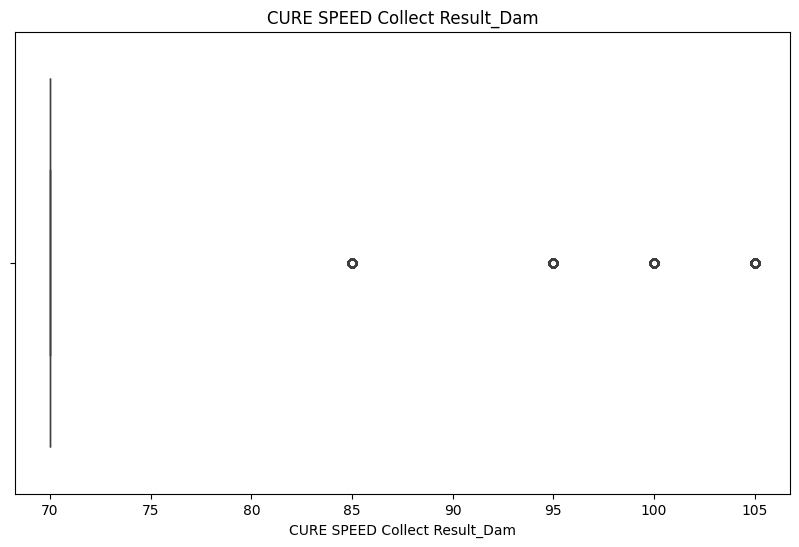

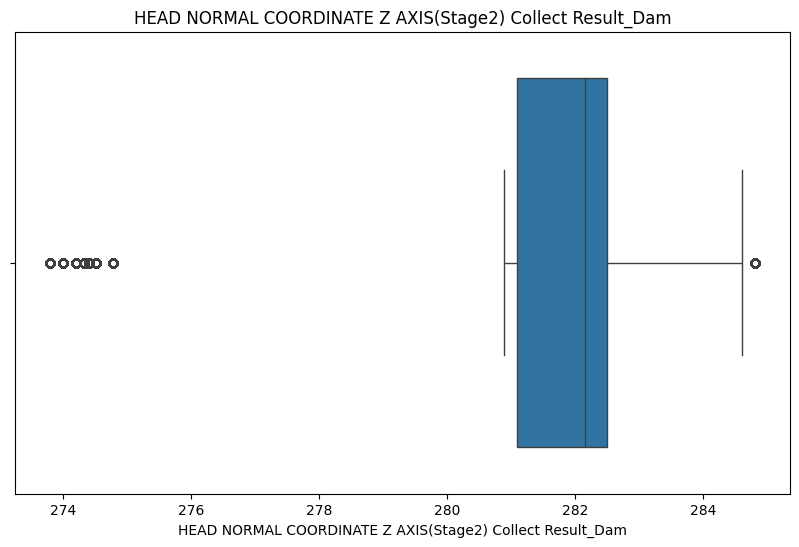

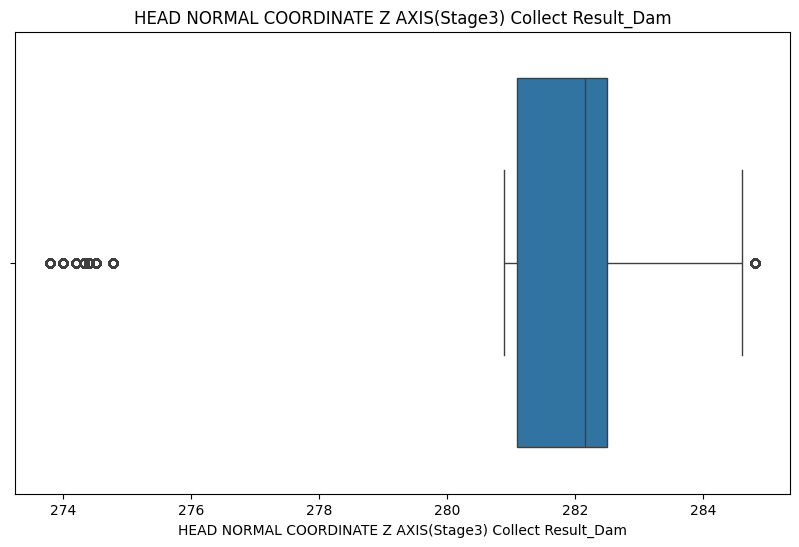

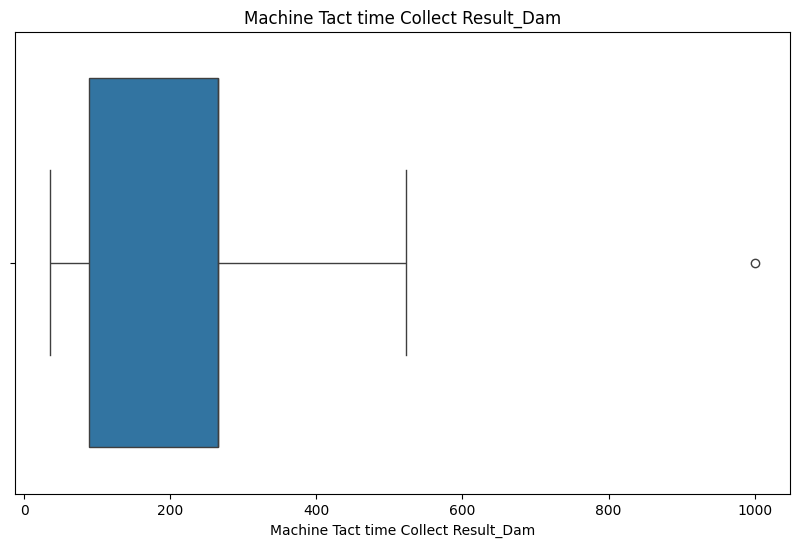

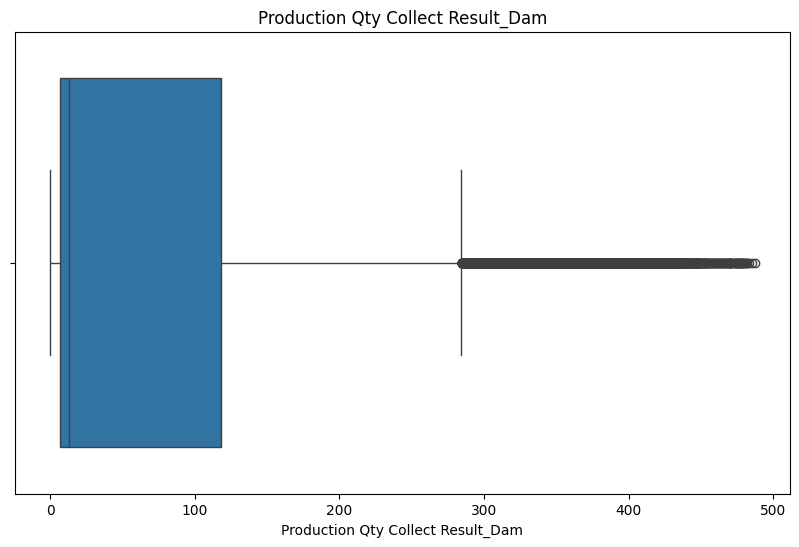

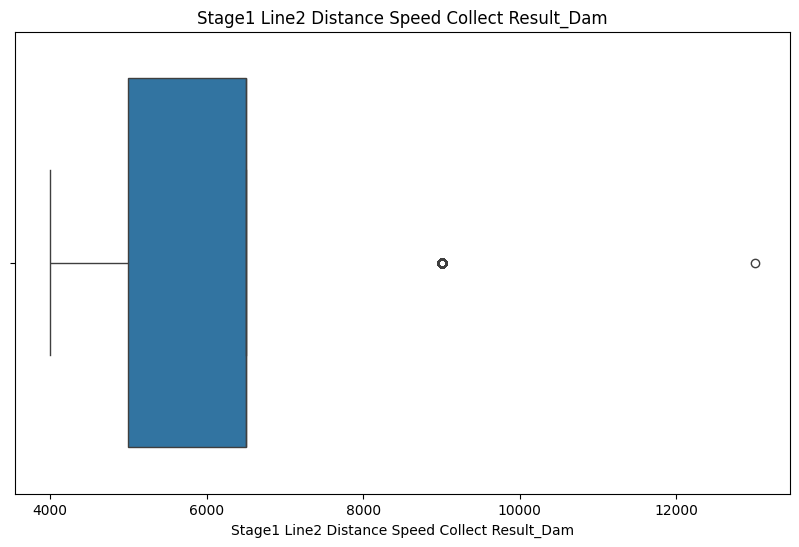

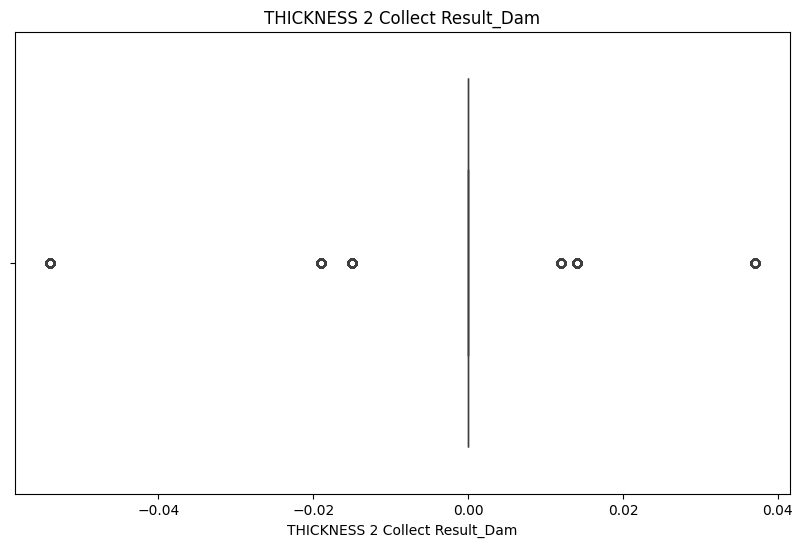

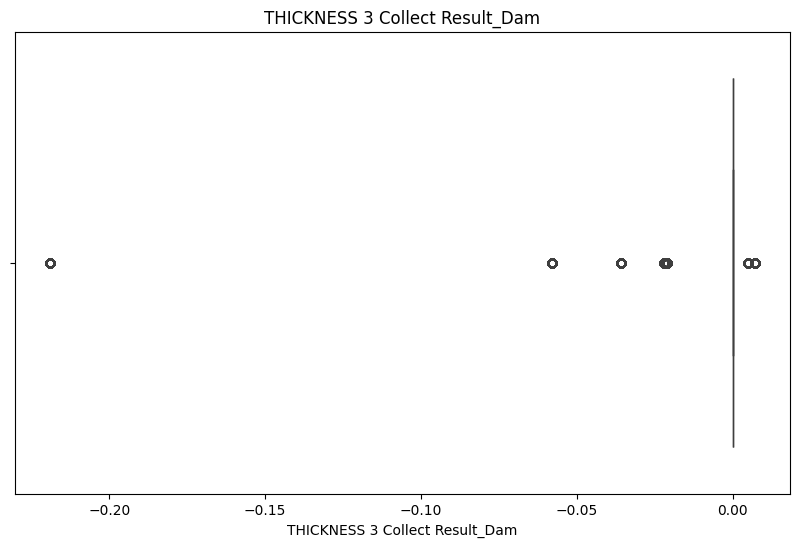

이 그룹에서 이상치가 존재하는 열의 개수: 8개


In [ ]:
plot_outliers_for_group(train_data_cleaned, dam_cols)

# AutoClave 이상치 탐지 (이상치X)

In [ ]:
plot_outliers_for_group(train_data_cleaned, autoclave_cols)

이 그룹에서 이상치가 존재하는 열의 개수: 0개


# Fill1 이상치 탐지(열 8개)

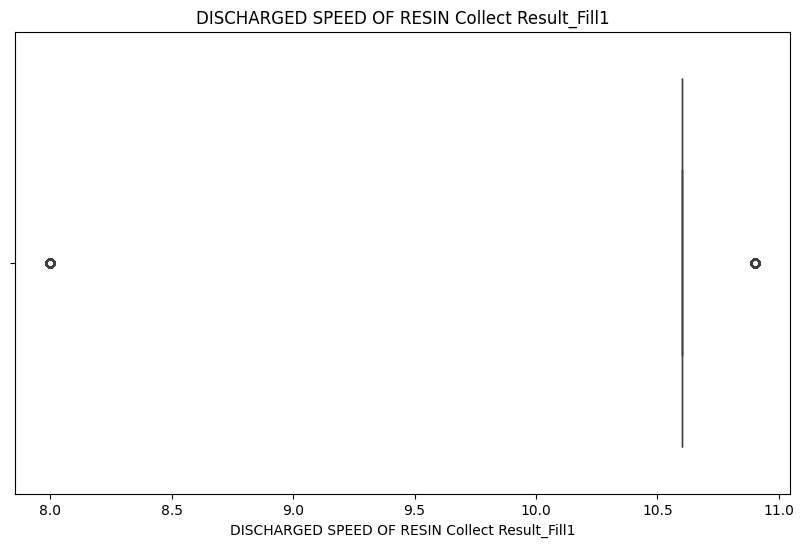

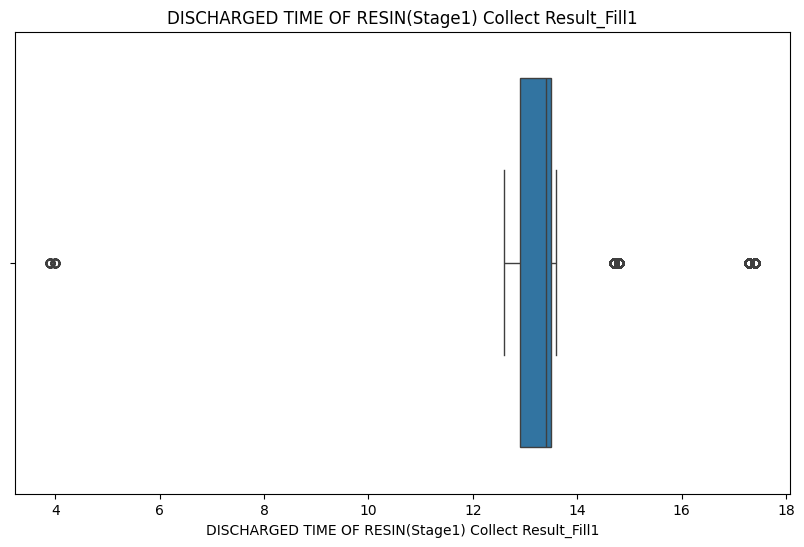

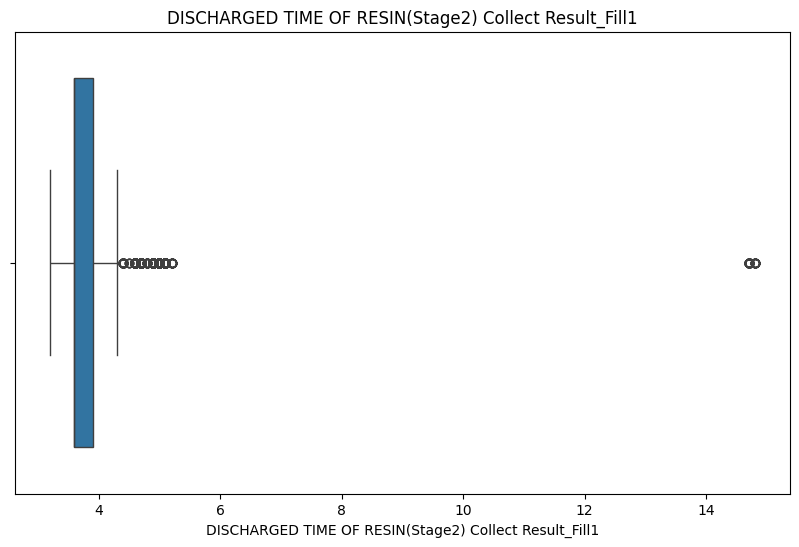

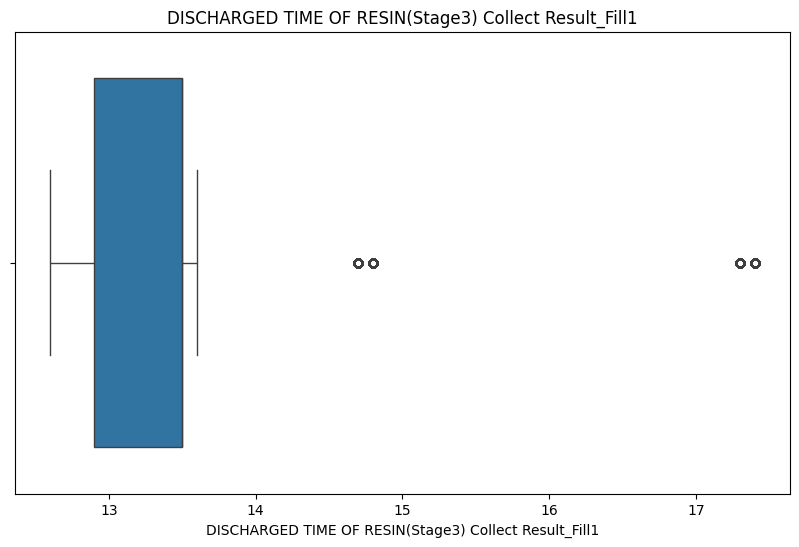

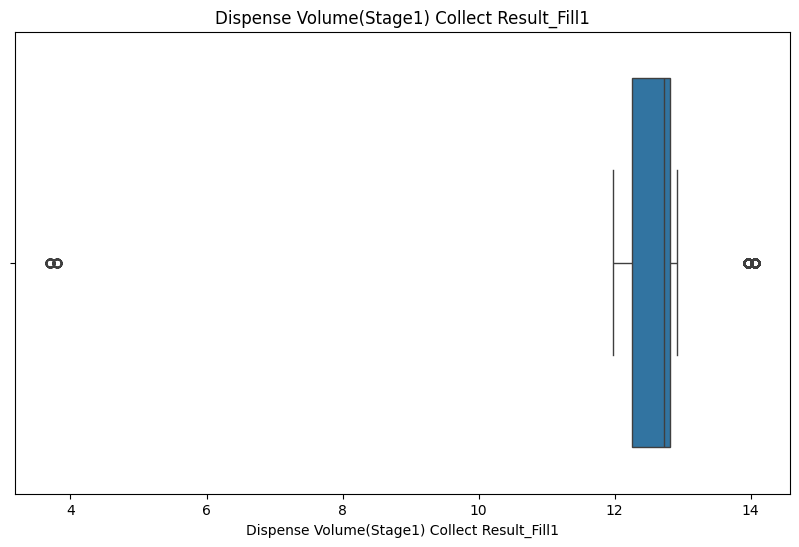

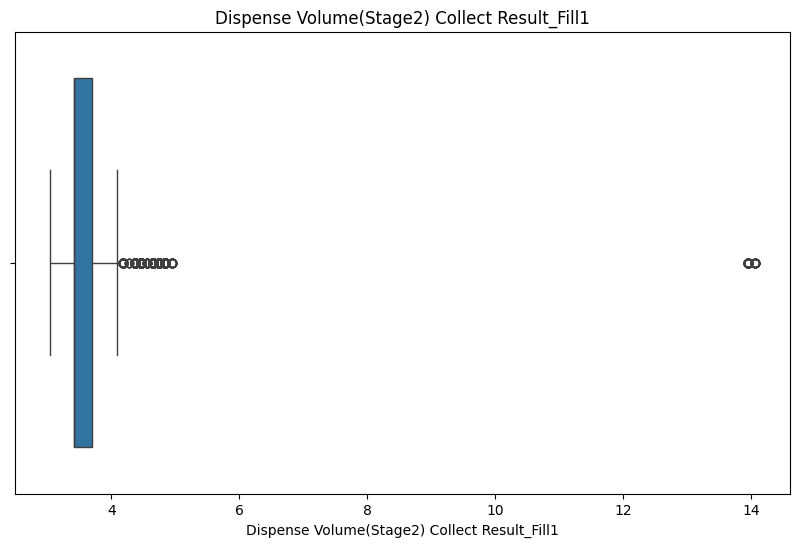

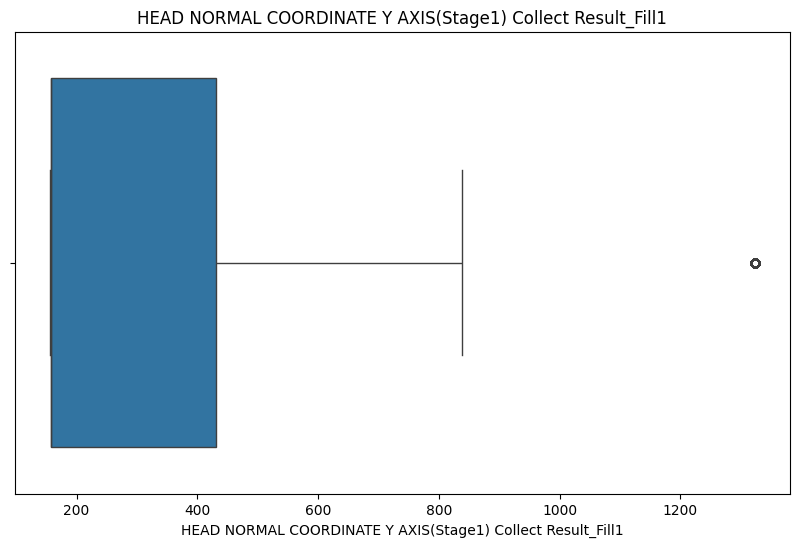

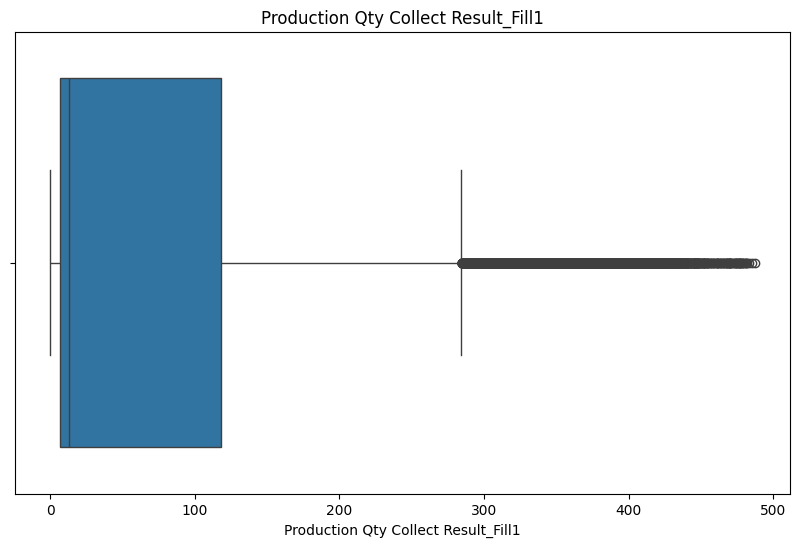

이 그룹에서 이상치가 존재하는 열의 개수: 8개


In [ ]:
plot_outliers_for_group(train_data_cleaned, fill1_cols)

# Fill2 이상치 탐지(열 9개)

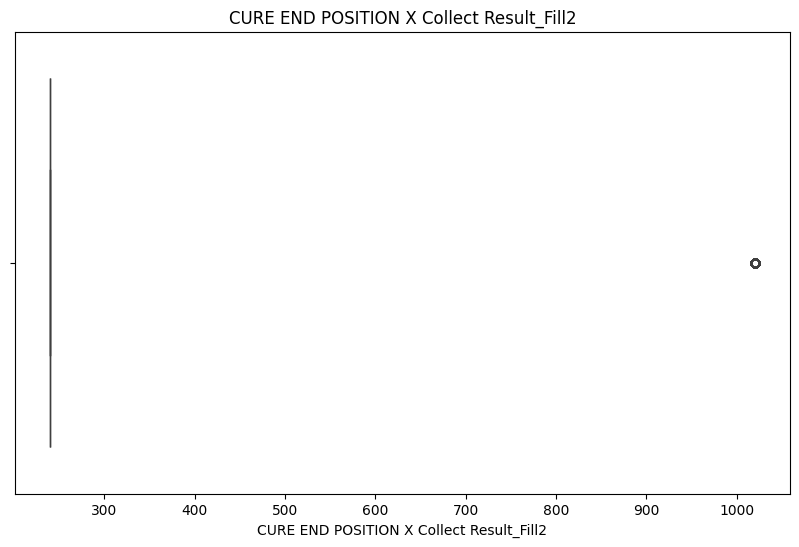

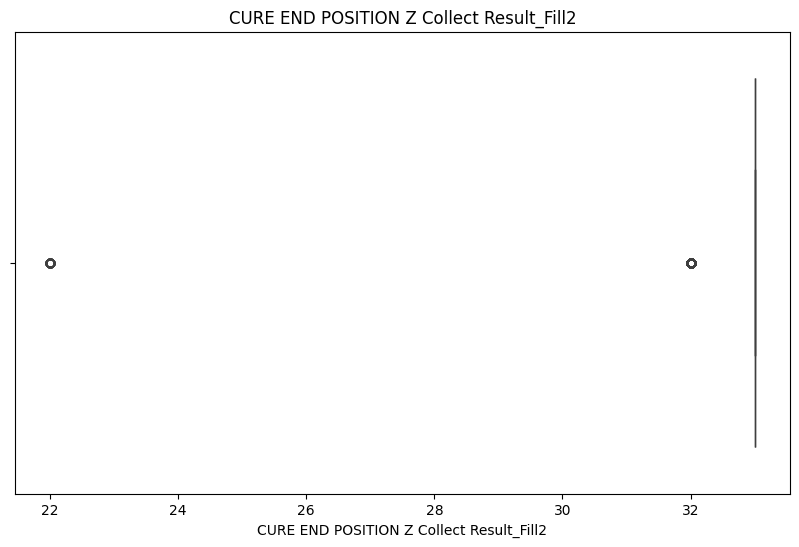

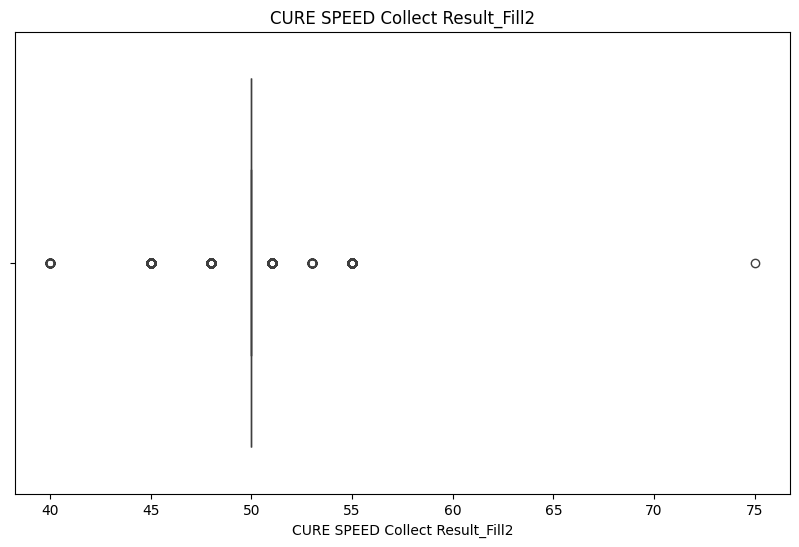

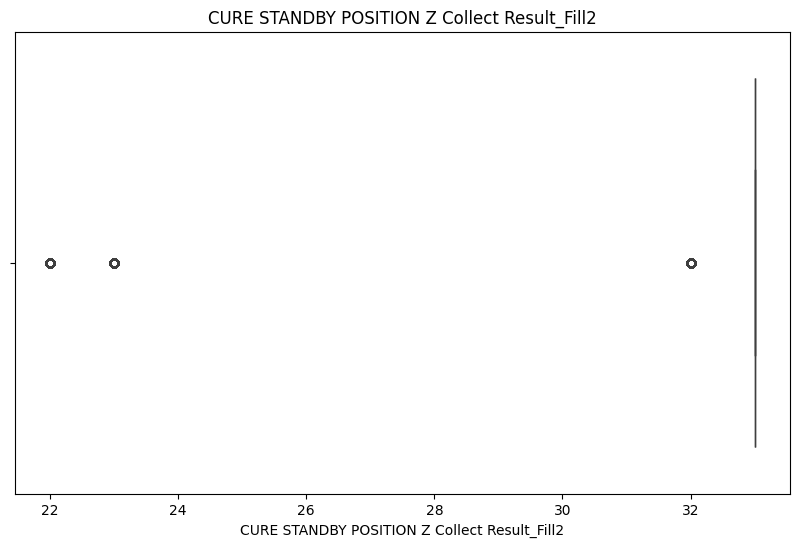

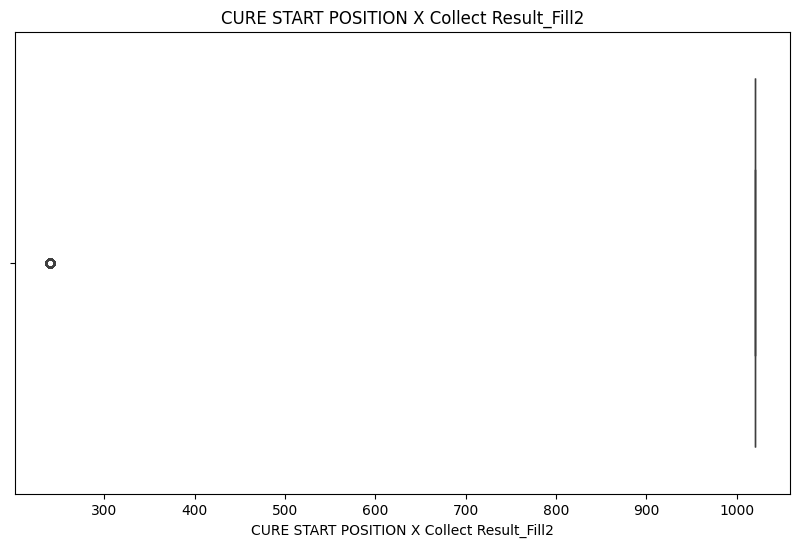

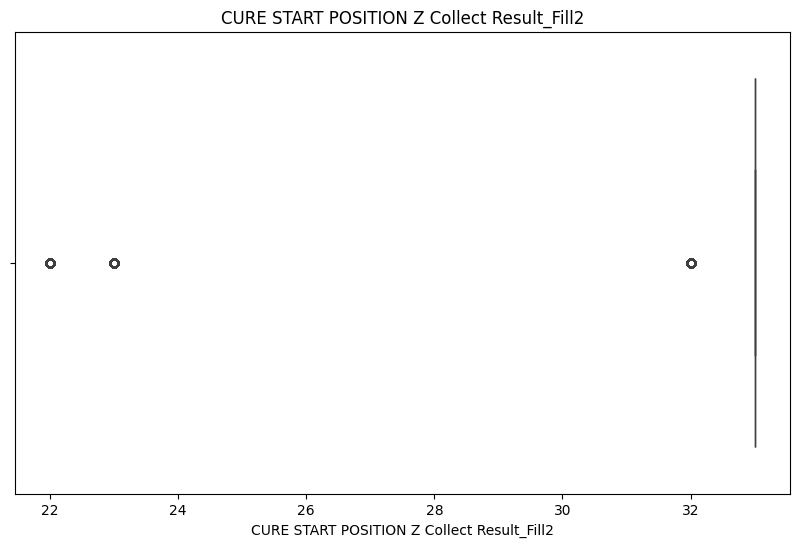

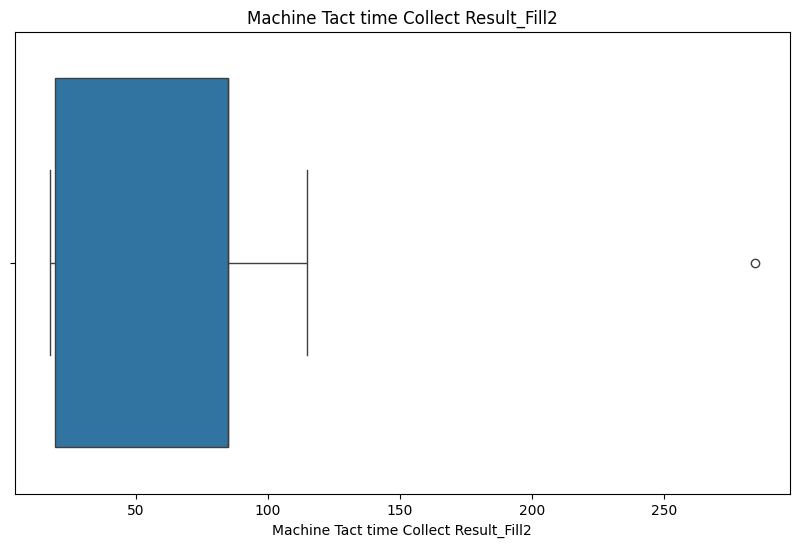

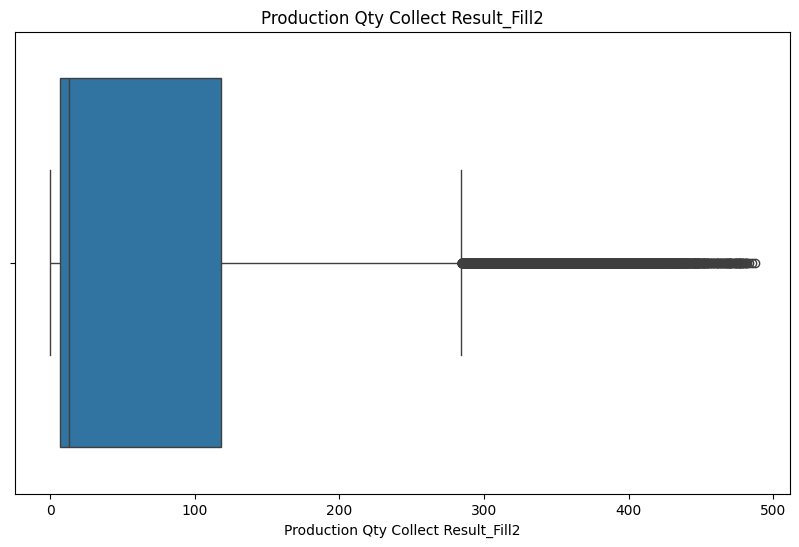

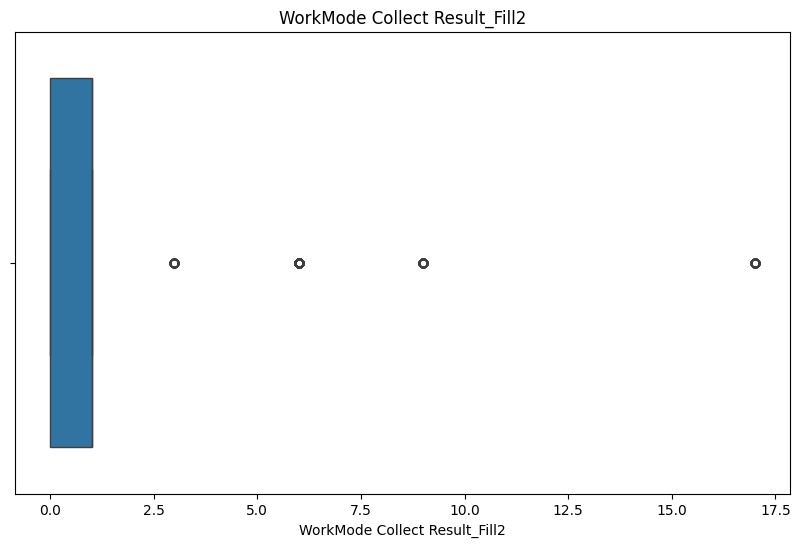

이 그룹에서 이상치가 존재하는 열의 개수: 9개


In [ ]:
plot_outliers_for_group(train_data_cleaned, fill2_cols)

**이상치 존재 행 : 총 21502개**

In [ ]:
train_data_cleaned

,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Production Qty Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,7,1,Normal
1,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.600,185,0,Normal
2,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,10,1,Normal
3,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.900,268,0,Normal
4,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.700,121,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.200,318,0,Normal
40502,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1000.0,12.5,90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,14,1,Normal
40503,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,85.000,1,1,Normal
40504,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,20.100,117,0,Normal


# 이상치 대체(knn)

In [ ]:
'''from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import KNNImputer
# 1. Quantile Transformation
# 수치형 데이터만 선택 (정규화를 위해)
numeric_columns = train_data_cleaned.select_dtypes(include=[float, int]).columns

# Quantile Transformer를 사용하여 데이터 분포를 정규화
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
train_data_cleaned[numeric_columns] = quantile_transformer.fit_transform(train_data_cleaned[numeric_columns])

# 2. KNN Imputation을 사용하여 이상치 대체
knn_imputer = KNNImputer(n_neighbors=5)
train_data_cleaned[numeric_columns] = knn_imputer.fit_transform(train_data_cleaned[numeric_columns])'''

"from sklearn.preprocessing import QuantileTransformer\nfrom sklearn.impute import KNNImputer\n# 1. Quantile Transformation\n# 수치형 데이터만 선택 (정규화를 위해)\nnumeric_columns = train_data_cleaned.select_dtypes(include=[float, int]).columns\n\n# Quantile Transformer를 사용하여 데이터 분포를 정규화\nquantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)\ntrain_data_cleaned[numeric_columns] = quantile_transformer.fit_transform(train_data_cleaned[numeric_columns])\n\n# 2. KNN Imputation을 사용하여 이상치 대체\nknn_imputer = KNNImputer(n_neighbors=5)\ntrain_data_cleaned[numeric_columns] = knn_imputer.fit_transform(train_data_cleaned[numeric_columns])"

# 이상치 대체 IQR cap

In [ ]:
# IQR을 이용한 이상치 탐지 및 상한선/하한선으로 대체하는 함수
'''def cap_outliers_iqr(df, column, iqr_multiplier=3):
    # 1분위수(25%)와 3분위수(75%) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # IQR을 사용해 상한선과 하한선 계산 (3 * IQR로 설정)
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # 하한선보다 작은 값은 하한선으로, 상한선보다 큰 값은 상한선으로 대체
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# 수치형 데이터 선택
numeric_columns = train_data_cleaned.select_dtypes(include=[float, int]).columns

# 각 수치형 컬럼에 대해 IQR 방법으로 이상치를 상한선/하한선으로 대체
for column in numeric_columns:
    cap_outliers_iqr(train_data_cleaned, column, iqr_multiplier=3)'''

'def cap_outliers_iqr(df, column, iqr_multiplier=3):\n    # 1분위수(25%)와 3분위수(75%) 계산\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n\n    # IQR을 사용해 상한선과 하한선 계산 (3 * IQR로 설정)\n    lower_bound = Q1 - iqr_multiplier * IQR\n    upper_bound = Q3 + iqr_multiplier * IQR\n\n    # 하한선보다 작은 값은 하한선으로, 상한선보다 큰 값은 상한선으로 대체\n    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])\n    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])\n\n# 수치형 데이터 선택\nnumeric_columns = train_data_cleaned.select_dtypes(include=[float, int]).columns\n\n# 각 수치형 컬럼에 대해 IQR 방법으로 이상치를 상한선/하한선으로 대체\nfor column in numeric_columns:\n    cap_outliers_iqr(train_data_cleaned, column, iqr_multiplier=3)'

In [ ]:
# 이상치가 남아있는지 확인하는 코드
'''def detect_remaining_outliers(df, column, iqr_multiplier=3):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # 남아있는 이상치 탐지
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# 남아있는 이상치 확인
total_remaining_outliers = 0
for column in numeric_columns:
    remaining_outliers = detect_remaining_outliers(train_data_cleaned, column, iqr_multiplier=3)
    if remaining_outliers > 0:
        print(f"'{column}' 열에 남아있는 이상치 개수: {remaining_outliers}개")
        total_remaining_outliers += remaining_outliers

if total_remaining_outliers == 0:
    print("이상치가 더 이상 존재하지 않습니다.")
else:
    print(f"총 {total_remaining_outliers}개의 이상치가 남아 있습니다.")'''

'def detect_remaining_outliers(df, column, iqr_multiplier=3):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n\n    lower_bound = Q1 - iqr_multiplier * IQR\n    upper_bound = Q3 + iqr_multiplier * IQR\n\n    # 남아있는 이상치 탐지\n    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]\n    return len(outliers)\n\n# 남아있는 이상치 확인\ntotal_remaining_outliers = 0\nfor column in numeric_columns:\n    remaining_outliers = detect_remaining_outliers(train_data_cleaned, column, iqr_multiplier=3)\n    if remaining_outliers > 0:\n        print(f"\'{column}\' 열에 남아있는 이상치 개수: {remaining_outliers}개")\n        total_remaining_outliers += remaining_outliers\n\nif total_remaining_outliers == 0:\n    print("이상치가 더 이상 존재하지 않습니다.")\nelse:\n    print(f"총 {total_remaining_outliers}개의 이상치가 남아 있습니다.")'

In [ ]:
train_data_cleaned

,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Production Qty Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,7,1,Normal
1,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.600,185,0,Normal
2,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,10,1,Normal
3,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.900,268,0,Normal
4,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.700,121,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1150,33.5,...,119,50,91.8,270.0,50,85,19.200,318,0,Normal
40502,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1000.0,12.5,90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,114.612,14,1,Normal
40503,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,240.0,2.5,-90,100,1150,33.5,...,-10,119,50.0,91.8,270,50,85.000,1,1,Normal
40504,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,1150,33.5,...,119,50,91.8,270.0,50,85,20.100,117,0,Normal


# 데이터 정규화 및 표준화

In [ ]:
# 스케일링 전 열 수 확인
print("Before scaling:", train_data_cleaned.shape)

# Min-Max 스케일러 초기화
scaler = MinMaxScaler()

# 수치형 컬럼 선택
numeric_cols = train_data_cleaned.select_dtypes(exclude=['object']).columns

# train_data_cleaned에 Min-Max 스케일링 적용
train_data_cleaned[numeric_cols] = scaler.fit_transform(train_data_cleaned[numeric_cols])

# 스케일링 후 열 수 확인
print("After scaling:", train_data_cleaned.shape)

Before scaling: (40099, 151)
After scaling: (40099, 151)


In [ ]:
train_data_cleaned

,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Production Qty Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,0.0,0.0,0.0,0.857143,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.364023,0.014374,0.058824,Normal
1,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.007505,0.379877,0.000000,Normal
2,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1.0,1.0,1.0,0.428571,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.364023,0.020534,0.058824,Normal
3,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1.0,1.0,1.0,0.000000,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.008630,0.550308,0.000000,Normal
4,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.007880,0.248460,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.006004,0.652977,0.000000,Normal
40502,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1.0,1.0,1.0,0.857143,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.364023,0.028747,0.058824,Normal
40503,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,0.0,0.0,0.0,0.857143,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.252908,0.002053,0.058824,Normal
40504,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1.0,1.0,1.0,0.000000,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.009381,0.240246,0.000000,Normal


In [ ]:
train_data_cleaned.to_csv("/content/drive/MyDrive/lgAimers.5(updated.ver)/modeling/train_data_cleaned(파생변수추가).csv", index = False)